Gauss-Seidel 

Solution: [ 3.00000035 -2.50000004  6.99999999]
Iterations: 3 

Solution: [ 3.  -2.5  7. ]
Iterations: 4 

Solution: [ 3.  -2.5  7. ]
Iterations: 6 

Jacobi 

Solution: [ 3.0000225  -2.50000266  6.99998104]
Iterations: 3 

Solution: [ 3.  -2.5  7. ]
Iterations: 6 

Solution: [ 3.  -2.5  7. ]
Iterations: 8 



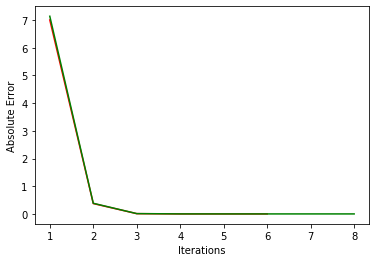

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errorJ = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, errorJ
        errorJ.append(np.linalg.norm(x_new-x, ord=np.inf))
        x = x_new
    return x, max_iterations, errorJ

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errorGS = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, errorGS
        errorGS.append(np.linalg.norm(x_new-x, ord=np.inf))
        x = x_new
    return x, max_iterations, errorGS

A = np.array([[3,-0.1,-0.2],[0.1,7,-0.3],[0.3,-0.2,10]])
b = np.array([7.85,-19.3,71.4])
x0 = np.zeros(3)
tolerance1 = 1e-3
tolerance2 = 1e-6
tolerance3 = 1e-9
max_iterations = 100
print('Gauss-Seidel \n')
solution, iterations, errorGS = gauss_seidel(A, b, x0, tolerance1, max_iterations)
print(f"Solution: {solution}")
print(f"Iterations: {iterations} \n")
solution, iterations, errorGS = gauss_seidel(A, b, x0, tolerance2, max_iterations)
print(f"Solution: {solution}")
print(f"Iterations: {iterations} \n")
solution, iterations, errorGS = gauss_seidel(A, b, x0, tolerance3, max_iterations)
print(f"Solution: {solution}")
print(f"Iterations: {iterations} \n")
print('Jacobi \n')
solution, iterations, errorJ = jacobi(A, b, x0, tolerance1, max_iterations)
print(f"Solution: {solution}")
print(f"Iterations: {iterations} \n")
solution, iterations, errorJ = jacobi(A, b, x0, tolerance2, max_iterations)
print(f"Solution: {solution}")
print(f"Iterations: {iterations} \n")
solution, iterations, errorJ = jacobi(A, b, x0, tolerance3, max_iterations)
print(f"Solution: {solution}")
print(f"Iterations: {iterations} \n")
plt.plot(range(1, len(errorGS)+1), errorGS, 'r')
plt.plot(range(1, len(errorJ)+1), errorJ, 'g')
plt.xlabel('Iterations')
plt.ylabel('Absolute Error')
plt.show()
#ChatGPT used to understand how to get convergence (absolute error between iterations)

Gauss-Seidel took less iterations to converge, especially as the tolerance got smaller. As the tolerance got smaller, the number of iterations for both methods to converge increased.